In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import requests
from bs4 import BeautifulSoup

In [2]:
url = "https://www.filmaffinity.com/us/topgen.php?genres=%2BAC&chv=0&orderby=rc&movietype=movie%7Cex-anim%3Aex-tv&country=US&fromyear=2020&toyear=2025&ratingcount=0&runtimemin=0&runtimemax=0"
page = requests.get(url)

In [3]:
page

<Response [200]>

In [4]:
page.text # string

'<!DOCTYPE html>\n<html lang="en">\n    <head>\n<title>Top Filmaffinity: The Best Movies and TV Series of All Time Sorted by Countries | Years | Genre - FilmAffinity</title>\n<meta charset="UTF-8">\n<meta name="description" content="Meta_desc no platform type Movies genre Action minyear 2020 max year 2025 ratcount FA of United States">\n<meta property="og:site_name" content="FilmAffinity">\n<meta name="twitter:site" content="@Filmaffinity" >\n<meta property="og:url" content="https://www.filmaffinity.com/us/topgen.php?genres=%2BAC&chv=0&orderby=rc&movietype=movie%7Cex-anim%3Aex-tv&country=US&fromyear=2020&toyear=2025&ratingcount=0&runtimemin=0&runtimemax=0" >\n<meta property="og:title" content="FilmAffinity" >\n<meta property="og:description" content="Meta_desc no platform type Movies genre Action minyear 2020 max year 2025 ratcount FA of United States" >\n<link rel="canonical" href="https://www.filmaffinity.com/us/topgen.php?genres=%2BAC&chv=0&orderby=rc&movietype=movie%7Cex-anim%3Aex-

In [5]:
Soup = BeautifulSoup(page.text) # converting String to html

In [6]:
Soup

<!DOCTYPE html>

<html lang="en">
<head>
<title>Top Filmaffinity: The Best Movies and TV Series of All Time Sorted by Countries | Years | Genre - FilmAffinity</title>
<meta charset="utf-8"/>
<meta content="Meta_desc no platform type Movies genre Action minyear 2020 max year 2025 ratcount FA of United States" name="description"/>
<meta content="FilmAffinity" property="og:site_name"/>
<meta content="@Filmaffinity" name="twitter:site"/>
<meta content="https://www.filmaffinity.com/us/topgen.php?genres=%2BAC&amp;chv=0&amp;orderby=rc&amp;movietype=movie%7Cex-anim%3Aex-tv&amp;country=US&amp;fromyear=2020&amp;toyear=2025&amp;ratingcount=0&amp;runtimemin=0&amp;runtimemax=0" property="og:url"/>
<meta content="FilmAffinity" property="og:title"/>
<meta content="Meta_desc no platform type Movies genre Action minyear 2020 max year 2025 ratcount FA of United States" property="og:description"/>
<link href="https://www.filmaffinity.com/us/topgen.php?genres=%2BAC&amp;chv=0&amp;orderby=rc&amp;movietype=m

In [7]:
Soup.find_all("div",class_="mc-title")[0].text

'The Batman'

In [8]:
for i in Soup.find_all("div",class_="mc-title"):
    print(i.text)

The Batman
Dune: Part Two
Spider-Man: No Way Home
Everything Everywhere All at Once
Top Gun: Maverick
Avatar: The Way of Water
Bullet Train
The Northman
Doctor Strange in the Multiverse of Madness
Guardians of the Galaxy Vol. 3
Deadpool & Wolverine
Indiana Jones and the Dial of Destiny
Civil War
Nobody
The Suicide Squad
Black Widow
Alien: Romulus
Free Guy
Eternals
The Matrix Resurrections
Thor: Love and Thunder
Justice League: The Snyder Cut
Shang-Chi and the Legend of the Ten Rings
Uncharted
John Wick: Chapter 4
Jurassic World: Dominion
Wonder Woman 1984
Prey
Mission: Impossible - Dead Reckoning - Part One
Extraction


In [9]:
#1
Titles = []
for i in Soup.find_all("div",class_="mc-title"):
    Titles.append(i.text)

In [10]:
len(Titles)

30

In [11]:
Soup.find_all("span",class_="mc-year")[0].text

'2022'

In [12]:
#2
Year = []
for i in Soup.find_all("span",class_="mc-year"):
    Year.append(i.text)

In [13]:
len(Year)

30

In [14]:
#3 
Rating = []
for i in Soup.find_all("div",class_="avg-rating"):
    Rating.append(i.text)

In [15]:
len(Rating)

30

In [16]:
#4
Votes = []
for i in Soup.find_all("div",class_="rat-count"):
    Votes.append(i.text)

In [17]:
len(Votes)

30

In [18]:
#5
Director = []
for i in Soup.find_all("div",class_="mc-director"):
    Director.append(i.text)


In [19]:
#6
Cast_members = []
for i in Soup.find_all("div",class_="mc-cast"):
    Cast_members.append(i.text)

In [20]:
df_Action = {
    "Title" : Titles,
    "Director" : Director,
    "Year" : Year,
    "Rating" : Rating,
    "No_of_votes" : Votes,
    "Cast_members": Cast_members
}

In [21]:
df_action = pd.DataFrame(df_Action)

In [22]:
df_action["Genres"]= "Action"

In [23]:
df_action

,Title,Director,Year,Rating,No_of_votes,Cast_members,Genres
0,The Batman,Matt Reeves,2022,6.9,"37,877","Robert Pattinson, Zoë Kravitz, Jeffrey Wright,...",Action
1,Dune: Part Two,Denis Villeneuve,2024,7.7,"34,748","Timothée Chalamet, Zendaya, Rebecca Ferguson, ...",Action
2,Spider-Man: No Way Home,Jon Watts,2021,7.0,"31,609","Tom Holland, Zendaya, Benedict Cumberbatch, Al...",Action
3,Everything Everywhere All at Once,"Dan Kwan, Daniel Scheinert, Daniels",2022,6.4,"31,034","Michelle Yeoh, Ke Huy Quan, Jamie Lee Curtis, ...",Action
4,Top Gun: Maverick,Joseph Kosinski,2022,7.0,"29,240","Tom Cruise, Miles Teller, Jennifer Connelly, J...",Action
5,Avatar: The Way of Water,James Cameron,2022,6.5,"27,833","Sam Worthington, Zoe Saldana, Sigourney Weaver...",Action
6,Bullet Train,David Leitch,2022,6.5,"27,655","Brad Pitt, Joey King, Aaron Taylor-Johnson, Br...",Action
7,The Northman,Robert Eggers,2022,6.4,"25,380","Alexander Skarsgård, Nicole Kidman, Anya Taylo...",Action
8,Doctor Strange in the Multiverse of Madness,Sam Raimi,2022,6.4,"22,799","Benedict Cumberbatch, Elizabeth Olsen, Xochitl...",Action
9,Guardians of the Galaxy Vol. 3,James Gunn,2023,7.1,"22,794","Chris Pratt, Zoe Saldana, Dave Bautista, Karen...",Action


In [24]:
url1 = 'https://www.filmaffinity.com/us/topgen.php?genres=%2BCO&chv=0&orderby=rc&movietype=movie%7Cex-anim%3Aex-tv&country=US&fromyear=2020&toyear=2025&ratingcount=0&runtimemin=0&runtimemax=0'
page1 = requests.get(url1)
Soup1 = BeautifulSoup(page1.text) # converting String to html
Titles = []
Year = []
Rating = []
Votes = []
Director = []
Cast_members = []
for i in Soup1.find_all("div",class_="mc-cast"):
    Cast_members.append(i.text)
for i in Soup1.find_all("div",class_="mc-title"):
    Titles.append(i.text)
for i in Soup1.find_all("span",class_="mc-year"):
    Year.append(i.text)
for i in Soup1.find_all("div",class_="avg-rating"):
    Rating.append(i.text)
for i in Soup1.find_all("div",class_="rat-count"):
    Votes.append(i.text)
for i in Soup1.find_all("div",class_="mc-director"):
    Director.append(i.text)
df_Adventure = {
    "Title" : Titles,
    "Director" : Director,
    "Year" : Year,
    "Rating" : Rating,
    "No_of_votes" : Votes,
    "Cast_members" : Cast_members
}
df_adventure = pd.DataFrame(df_Adventure)
df_adventure["Genres"]="Adventure"

In [25]:
df_adventure.head()

,Title,Director,Year,Rating,No_of_votes,Cast_members,Genres
0,Don't Look Up,Adam McKay,2021,6.6,"46,036","Leonardo DiCaprio, Jennifer Lawrence, Meryl St...",Adventure
1,Barbie,Greta Gerwig,2023,5.8,"39,697","Margot Robbie, Ryan Gosling, America Ferrera, ...",Adventure
2,Everything Everywhere All at Once,"Dan Kwan, Daniel Scheinert, Daniels",2022,6.4,"31,034","Michelle Yeoh, Ke Huy Quan, Jamie Lee Curtis, ...",Adventure
3,Bullet Train,David Leitch,2022,6.5,"27,655","Brad Pitt, Joey King, Aaron Taylor-Johnson, Br...",Adventure
4,Glass Onion: A Knives Out Mystery,Rian Johnson,2022,6.1,"25,159","Daniel Craig, Edward Norton, Janelle Monáe, Ka...",Adventure


In [26]:
url2 = 'https://www.filmaffinity.com/us/topgen.php?genres=%2BCO&chv=0&orderby=rc&movietype=movie%7Cex-anim%3Aex-tv&country=US&fromyear=2020&toyear=2025&ratingcount=0&runtimemin=0&runtimemax=0'
page2 = requests.get(url2)
Soup2 = BeautifulSoup(page2.text) # converting String to html
Titles = []
Year = []
Rating = []
Votes = []
Director = []
Cast_members = []
for i in Soup2.find_all("div",class_="mc-cast"):
    Cast_members.append(i.text)
for i in Soup2.find_all("div",class_="mc-title"):
    Titles.append(i.text)
for i in Soup2.find_all("span",class_="mc-year"):
    Year.append(i.text)
for i in Soup2.find_all("div",class_="avg-rating"):
    Rating.append(i.text)
for i in Soup2.find_all("div",class_="rat-count"):
    Votes.append(i.text)
for i in Soup2.find_all("div",class_="mc-director"):
    Director.append(i.text)
df_Comedy = {
    "Title" : Titles,
    "Director" : Director,
    "Year" : Year,
    "Rating" : Rating,
    "No_of_votes" : Votes,
    "Cast_members": Cast_members
}
df_comedy = pd.DataFrame(df_Comedy)
df_comedy["Genres"]="Comedy"

In [27]:
df_comedy

,Title,Director,Year,Rating,No_of_votes,Cast_members,Genres
0,Don't Look Up,Adam McKay,2021,6.6,"46,036","Leonardo DiCaprio, Jennifer Lawrence, Meryl St...",Comedy
1,Barbie,Greta Gerwig,2023,5.8,"39,697","Margot Robbie, Ryan Gosling, America Ferrera, ...",Comedy
2,Everything Everywhere All at Once,"Dan Kwan, Daniel Scheinert, Daniels",2022,6.4,"31,034","Michelle Yeoh, Ke Huy Quan, Jamie Lee Curtis, ...",Comedy
3,Bullet Train,David Leitch,2022,6.5,"27,655","Brad Pitt, Joey King, Aaron Taylor-Johnson, Br...",Comedy
4,Glass Onion: A Knives Out Mystery,Rian Johnson,2022,6.1,"25,159","Daniel Craig, Edward Norton, Janelle Monáe, Ka...",Comedy
5,Babylon,Damien Chazelle,2022,6.9,"23,909","Margot Robbie, Brad Pitt, Diego Calva, Jean Sm...",Comedy
6,Guardians of the Galaxy Vol. 3,James Gunn,2023,7.1,"22,794","Chris Pratt, Zoe Saldana, Dave Bautista, Karen...",Comedy
7,Deadpool & Wolverine,Shawn Levy,2024,6.7,"22,499","Ryan Reynolds, Hugh Jackman, Emma Corrin, Matt...",Comedy
8,Nobody,Ilya Naishuller,2021,6.5,"20,870","Bob Odenkirk, Aleksey Serebryakov, Connie Niel...",Comedy
9,Cruella,Craig Gillespie,2021,6.4,"19,350","Emma Stone, Emma Thompson, Joel Fry, Paul Walt...",Comedy


In [28]:
url3 = "https://www.filmaffinity.com/us/topgen.php?genres=%2BDR&chv=0&orderby=rc&movietype=movie%7Cex-anim%3Aex-tv&country=US&fromyear=2020&toyear=2025&ratingcount=0&runtimemin=0&runtimemax=0"
page3 = requests.get(url3)
Soup3 = BeautifulSoup(page3.text) # converting String to html
Titles = []
Year = []
Rating = []
Votes = []
Director = []
Cast_members = []
for i in Soup3.find_all("div",class_="mc-cast"):
    Cast_members.append(i.text)
for i in Soup3.find_all("div",class_="mc-title"):
    Titles.append(i.text)
for i in Soup3.find_all("span",class_="mc-year"):
    Year.append(i.text)
for i in Soup3.find_all("div",class_="avg-rating"):
    Rating.append(i.text)
for i in Soup3.find_all("div",class_="rat-count"):
    Votes.append(i.text)
for i in Soup3.find_all("div",class_="mc-director"):
    Director.append(i.text)
df_Drama = {
    "Title" : Titles,
    "Director" : Director,
    "Year" : Year,
    "Rating" : Rating,
    "No_of_votes" : Votes,
    "Cast_members": Cast_members
}
df_drama= pd.DataFrame(df_Drama)
df_drama["Genres"]= "Drama"

In [29]:
df_drama

,Title,Director,Year,Rating,No_of_votes,Cast_members,Genres
0,Dune,Denis Villeneuve,2021,7.2,"49,959","Timothée Chalamet, Rebecca Ferguson, Oscar Isa...",Drama
1,Don't Look Up,Adam McKay,2021,6.6,"46,036","Leonardo DiCaprio, Jennifer Lawrence, Meryl St...",Drama
2,Oppenheimer,Christopher Nolan,2023,7.4,"44,922","Cillian Murphy, Emily Blunt, Robert Downey Jr....",Drama
3,Dune: Part Two,Denis Villeneuve,2024,7.7,"34,748","Timothée Chalamet, Zendaya, Rebecca Ferguson, ...",Drama
4,Top Gun: Maverick,Joseph Kosinski,2022,7.0,"29,240","Tom Cruise, Miles Teller, Jennifer Connelly, J...",Drama
5,Nomadland,Chloé Zhao,2020,6.7,"25,827","Frances McDormand, David Strathairn, Linda May...",Drama
6,The Northman,Robert Eggers,2022,6.4,"25,380","Alexander Skarsgård, Nicole Kidman, Anya Taylo...",Drama
7,The Last Duel,Ridley Scott,2021,7.0,"25,239","Matt Damon, Adam Driver, Jodie Comer, Ben Affl...",Drama
8,Babylon,Damien Chazelle,2022,6.9,"23,909","Margot Robbie, Brad Pitt, Diego Calva, Jean Sm...",Drama
9,Old,M. Night Shyamalan,2021,5.6,"23,452","Gael García Bernal, Vicky Krieps, Rufus Sewell...",Drama


In [30]:
url4 = "https://www.filmaffinity.com/us/topgen.php?genres=%2BFAN&chv=0&orderby=rc&movietype=movie%7Cex-anim%3Aex-tv&country=US&fromyear=2020&toyear=2025&ratingcount=0&runtimemin=0&runtimemax=0"
page4 = requests.get(url4)
Soup4 = BeautifulSoup(page4.text) # converting String to html
Titles = []
Year = []
Rating = []
Votes = []
Director = []
Cast_members = []
for i in Soup4.find_all("div",class_="mc-cast"):
    Cast_members.append(i.text)
for i in Soup4.find_all("div",class_="mc-title"):
    Titles.append(i.text)
for i in Soup4.find_all("span",class_="mc-year"):
    Year.append(i.text)
for i in Soup4.find_all("div",class_="avg-rating"):
    Rating.append(i.text)
for i in Soup4.find_all("div",class_="rat-count"):
    Votes.append(i.text)
for i in Soup4.find_all("div",class_="mc-director"):
    Director.append(i.text)
df_Fantasy = {
    "Title" : Titles,
    "Director" : Director,
    "Year" : Year,
    "Rating" : Rating,
    "No_of_votes" : Votes,
    "Cast_members": Cast_members
}
df_fantasy= pd.DataFrame(df_Fantasy)
df_fantasy["Genres"]= "Fantasy"

In [31]:
df_fantasy

,Title,Director,Year,Rating,No_of_votes,Cast_members,Genres
0,Barbie,Greta Gerwig,2023,5.8,"39,697","Margot Robbie, Ryan Gosling, America Ferrera, ...",Fantasy
1,Spider-Man: No Way Home,Jon Watts,2021,7.0,"31,609","Tom Holland, Zendaya, Benedict Cumberbatch, Al...",Fantasy
2,Everything Everywhere All at Once,"Dan Kwan, Daniel Scheinert, Daniels",2022,6.4,"31,034","Michelle Yeoh, Ke Huy Quan, Jamie Lee Curtis, ...",Fantasy
3,Avatar: The Way of Water,James Cameron,2022,6.5,"27,833","Sam Worthington, Zoe Saldana, Sigourney Weaver...",Fantasy
4,Old,M. Night Shyamalan,2021,5.6,"23,452","Gael García Bernal, Vicky Krieps, Rufus Sewell...",Fantasy
5,Doctor Strange in the Multiverse of Madness,Sam Raimi,2022,6.4,"22,799","Benedict Cumberbatch, Elizabeth Olsen, Xochitl...",Fantasy
6,Deadpool & Wolverine,Shawn Levy,2024,6.7,"22,499","Ryan Reynolds, Hugh Jackman, Emma Corrin, Matt...",Fantasy
7,A Quiet Place: Part II,John Krasinski,2020,6.4,"20,345","Emily Blunt, Cillian Murphy, Millicent Simmond...",Fantasy
8,The Suicide Squad,James Gunn,2021,6.3,"20,332","Idris Elba, Margot Robbie, Joel Kinnaman, Viol...",Fantasy
9,Free Guy,Shawn Levy,2021,6.2,"18,895","Ryan Reynolds, Jodie Comer, Joe Keery, Lil Rel...",Fantasy


In [32]:
url5 ="https://www.filmaffinity.com/us/topgen.php?genres=%2BTE&chv=0&orderby=rc&movietype=movie%7Cex-anim%3Aex-tv&country=US&fromyear=2020&toyear=2025&ratingcount=0&runtimemin=0&runtimemax=0"
page5 = requests.get(url5)
Soup5 = BeautifulSoup(page5.text) # converting String to html
Titles = []
Year = []
Rating = []
Votes = []
Director = []
Cast_members = []
for i in Soup5.find_all("div",class_="mc-cast"):
    Cast_members.append(i.text)
for i in Soup5.find_all("div",class_="mc-title"):
    Titles.append(i.text)
for i in Soup5.find_all("span",class_="mc-year"):
    Year.append(i.text)
for i in Soup5.find_all("div",class_="avg-rating"):
    Rating.append(i.text)
for i in Soup5.find_all("div",class_="rat-count"):
    Votes.append(i.text)
for i in Soup5.find_all("div",class_="mc-director"):
    Director.append(i.text)
df_Horror = {
    "Title" : Titles,
    "Director" : Director,
    "Year" : Year,
    "Rating" : Rating,
    "No_of_votes" : Votes,
    "Cast_members": Cast_members
}
df_horror= pd.DataFrame(df_Horror)
df_horror["Genres"]= "Horror"

In [33]:
df_horror

,Title,Director,Year,Rating,No_of_votes,Cast_members,Genres
0,The Menu,Mark Mylod,2022,6.2,"24,935","Anya Taylor-Joy, Nicholas Hoult, Ralph Fiennes...",Horror
1,Doctor Strange in the Multiverse of Madness,Sam Raimi,2022,6.4,"22,799","Benedict Cumberbatch, Elizabeth Olsen, Xochitl...",Horror
2,A Quiet Place: Part II,John Krasinski,2020,6.4,"20,345","Emily Blunt, Cillian Murphy, Millicent Simmond...",Horror
3,Alien: Romulus,Fede Álvarez,2024,6.4,"19,374","Cailee Spaeny, David Jonsson, Archie Renaux, I...",Horror
4,The Invisible Man,Leigh Whannell,2020,6.1,"17,935","Elisabeth Moss, Storm Reid, Harriet Dyer, Aldi...",Horror
5,Nope,Jordan Peele,2022,6.0,"17,717","Daniel Kaluuya, Keke Palmer, Brandon Perea, St...",Horror
6,Nosferatu,Robert Eggers,2024,6.8,"17,700","Lily-Rose Depp, Bill Skarsgård, Nicholas Hoult...",Horror
7,Smile,Parker Finn,2022,5.9,"16,937","Sosie Bacon, Jessie T. Usher, Kyle Gallner, Ca...",Horror
8,Barbarian,Zach Cregger,2022,6.2,"15,567","Georgina Campbell, Bill Skarsgård, Justin Long...",Horror
9,Knock at the Cabin,M. Night Shyamalan,2023,5.8,"15,279","Dave Bautista, Jonathan Groff, Ben Aldridge, K...",Horror


In [34]:
url6 = "https://www.filmaffinity.com/us/topgen.php?genres=%2BINT&chv=0&orderby=rc&movietype=movie%7Cex-anim%3Aex-tv&country=US&fromyear=2020&toyear=2025&ratingcount=0&runtimemin=0&runtimemax=0"
page6 = requests.get(url6)
Soup6 = BeautifulSoup(page6.text) # converting String to html
Titles = []
Year = []
Rating = []
Votes = []
Director = []
Cast_members = []
for i in Soup6.find_all("div",class_="mc-cast"):
    Cast_members.append(i.text)
for i in Soup6.find_all("div",class_="mc-title"):
    Titles.append(i.text)
for i in Soup6.find_all("span",class_="mc-year"):
    Year.append(i.text)
for i in Soup6.find_all("div",class_="avg-rating"):
    Rating.append(i.text)
for i in Soup6.find_all("div",class_="rat-count"):
    Votes.append(i.text)
for i in Soup6.find_all("div",class_="mc-director"):
    Director.append(i.text)
df_Mystery = {
    "Title" : Titles,
    "Director" : Director,
    "Year" : Year,
    "Rating" : Rating,
    "No_of_votes" : Votes,
    "Cast_members": Cast_members
}
df_mystery =pd.DataFrame(df_Mystery)
df_mystery["Genres"]= "Mystery"

In [35]:
df_mystery

,Title,Director,Year,Rating,No_of_votes,Cast_members,Genres
0,The Batman,Matt Reeves,2022,6.9,"37,877","Robert Pattinson, Zoë Kravitz, Jeffrey Wright,...",Mystery
1,The Last Duel,Ridley Scott,2021,7.0,"25,239","Matt Damon, Adam Driver, Jodie Comer, Ben Affl...",Mystery
2,Glass Onion: A Knives Out Mystery,Rian Johnson,2022,6.1,"25,159","Daniel Craig, Edward Norton, Janelle Monáe, Ka...",Mystery
3,Old,M. Night Shyamalan,2021,5.6,"23,452","Gael García Bernal, Vicky Krieps, Rufus Sewell...",Mystery
4,Juror #2,Clint Eastwood,2024,6.8,"21,322","Nicholas Hoult, Toni Collette, J.K. Simmons, K...",Mystery
5,A Quiet Place: Part II,John Krasinski,2020,6.4,"20,345","Emily Blunt, Cillian Murphy, Millicent Simmond...",Mystery
6,The Killer,David Fincher,2023,6.2,"18,863","Michael Fassbender, Tilda Swinton, Charles Par...",Mystery
7,The Invisible Man,Leigh Whannell,2020,6.1,"17,935","Elisabeth Moss, Storm Reid, Harriet Dyer, Aldi...",Mystery
8,Nope,Jordan Peele,2022,6.0,"17,717","Daniel Kaluuya, Keke Palmer, Brandon Perea, St...",Mystery
9,Trap,M. Night Shyamalan,2024,5.3,"16,719","Josh Hartnett, Ariel Joy Donoghue, Saleka, Ali...",Mystery


In [36]:
url7="https://www.filmaffinity.com/us/topgen.php?genres=%2BRO&chv=0&orderby=rc&movietype=movie%7Cex-anim%3Aex-tv&country=US&fromyear=2020&toyear=2025&ratingcount=0&runtimemin=0&runtimemax=0"
page7 = requests.get(url7)
Soup7 = BeautifulSoup(page7.text) # converting String to html
Titles = []
Year = []
Rating = []
Votes = []
Director = []
Cast_members = []
for i in Soup7.find_all("div",class_="mc-cast"):
    Cast_members.append(i.text)
for i in Soup7.find_all("div",class_="mc-title"):
    Titles.append(i.text)
for i in Soup7.find_all("span",class_="mc-year"):
    Year.append(i.text)
for i in Soup7.find_all("div",class_="avg-rating"):
    Rating.append(i.text)
for i in Soup7.find_all("div",class_="rat-count"):
    Votes.append(i.text)
for i in Soup7.find_all("div",class_="mc-director"):
    Director.append(i.text)
df_Romance = {
    "Title" : Titles,
    "Director" : Director,
    "Year" : Year,
    "Rating" : Rating,
    "No_of_votes" : Votes,
    "Cast_members": Cast_members
}
df_romance =pd.DataFrame(df_Romance)
df_romance["Genres"]= "Romance"

In [37]:
df_romance

,Title,Director,Year,Rating,No_of_votes,Cast_members,Genres
0,Past Lives,Celine Song,2023,7.2,"19,939","Greta Lee, Yoo Teo, John Magaro, Moon Seung-ah...",Romance
1,Licorice Pizza,Paul Thomas Anderson,2021,6.5,"18,627","Alana Haim, Cooper Hoffman, Sean Penn, Bradley...",Romance
2,Thor: Love and Thunder,Taika Waititi,2022,5.3,"18,129","Chris Hemsworth, Natalie Portman, Christian Ba...",Romance
3,Palm Springs,Max Barbakow,2020,6.6,"16,063","Andy Samberg, Cristin Milioti, J.K. Simmons, M...",Romance
4,Joker: Folie à Deux,Todd Phillips,2024,5.2,"14,227","Joaquin Phoenix, Lady Gaga, Brendan Gleeson, C...",Romance
5,Challengers,Luca Guadagnino,2024,6.3,"11,465","Zendaya, Josh O'Connor, Mike Faist, A.J. Liste...",Romance
6,West Side Story,Steven Spielberg,2021,6.7,"11,268","Rachel Zegler, Ansel Elgort, David Alvarez, Ar...",Romance
7,The Fall Guy,David Leitch,2024,6.0,"9,876","Ryan Gosling, Emily Blunt, Aaron Taylor-Johnso...",Romance
8,The Little Mermaid,Rob Marshall,2023,5.3,"9,002","Halle Bailey, Jonah Hauer-King, Javier Bardem,...",Romance
9,Anyone But You,Will Gluck,2023,5.2,"6,230","Sydney Sweeney, Glen Powell, Dermot Mulroney, ...",Romance


In [38]:
url8="https://www.filmaffinity.com/us/topgen.php?genres=%2BTH&chv=0&orderby=rc&movietype=movie%7Cex-anim%3Aex-tv&country=US&fromyear=2020&toyear=2025&ratingcount=0&runtimemin=0&runtimemax=0"
page8 = requests.get(url8)
Soup8 = BeautifulSoup(page8.text) # converting String to html
Titles = []
Year = []
Rating = []
Votes = []
Director = []
Cast_members = []
for i in Soup8.find_all("div",class_="mc-cast"):
    Cast_members.append(i.text)
for i in Soup8.find_all("div",class_="mc-title"):
    Titles.append(i.text)
for i in Soup8.find_all("span",class_="mc-year"):
    Year.append(i.text)
for i in Soup8.find_all("div",class_="avg-rating"):
    Rating.append(i.text)
for i in Soup8.find_all("div",class_="rat-count"):
    Votes.append(i.text)
for i in Soup8.find_all("div",class_="mc-director"):
    Director.append(i.text)
df_Thriller = {
    "Title" : Titles,
    "Director" : Director,
    "Year" : Year,
    "Rating" : Rating,
    "No_of_votes" : Votes,
    "Cast_members": Cast_members
}
df_thriller =pd.DataFrame(df_Thriller)
df_thriller["Genres"]= "Thriller"

In [39]:
df_thriller

,Title,Director,Year,Rating,No_of_votes,Cast_members,Genres
0,Oppenheimer,Christopher Nolan,2023,7.4,"44,922","Cillian Murphy, Emily Blunt, Robert Downey Jr....",Thriller
1,The Batman,Matt Reeves,2022,6.9,"37,877","Robert Pattinson, Zoë Kravitz, Jeffrey Wright,...",Thriller
2,Bullet Train,David Leitch,2022,6.5,"27,655","Brad Pitt, Joey King, Aaron Taylor-Johnson, Br...",Thriller
3,The Menu,Mark Mylod,2022,6.2,"24,935","Anya Taylor-Joy, Nicholas Hoult, Ralph Fiennes...",Thriller
4,Old,M. Night Shyamalan,2021,5.6,"23,452","Gael García Bernal, Vicky Krieps, Rufus Sewell...",Thriller
5,Killers of the Flower Moon,Martin Scorsese,2023,7.0,"23,176","Leonardo DiCaprio, Robert De Niro, Lily Gladst...",Thriller
6,Juror #2,Clint Eastwood,2024,6.8,"21,322","Nicholas Hoult, Toni Collette, J.K. Simmons, K...",Thriller
7,Civil War,Alex Garland,2024,6.6,"21,185","Kirsten Dunst, Wagner Moura, Cailee Spaeny, St...",Thriller
8,Nobody,Ilya Naishuller,2021,6.5,"20,870","Bob Odenkirk, Aleksey Serebryakov, Connie Niel...",Thriller
9,A Quiet Place: Part II,John Krasinski,2020,6.4,"20,345","Emily Blunt, Cillian Murphy, Millicent Simmond...",Thriller


In [40]:
url9 = "https://www.filmaffinity.com/us/topgen.php?genres=%2BC-F&chv=0&orderby=rc&movietype=movie%7Cex-anim%3Aex-tv&country=US&fromyear=2020&toyear=2025&ratingcount=0&runtimemin=0&runtimemax=0"
page9 = requests.get(url9)
Soup9 = BeautifulSoup(page9.text) # converting String to html
Titles = []
Year = []
Rating = []
Votes = []
Director = []
Cast_members = []
for i in Soup9.find_all("div",class_="mc-cast"):
    Cast_members.append(i.text)
for i in Soup9.find_all("div",class_="mc-title"):
    Titles.append(i.text)
for i in Soup9.find_all("span",class_="mc-year"):
    Year.append(i.text)
for i in Soup9.find_all("div",class_="avg-rating"):
    Rating.append(i.text)
for i in Soup9.find_all("div",class_="rat-count"):
    Votes.append(i.text)
for i in Soup9.find_all("div",class_="mc-director"):
    Director.append(i.text)
df_Scifi = {
    "Title" : Titles,
    "Director" : Director,
    "Year" : Year,
    "Rating" : Rating,
    "No_of_votes" : Votes,
    "Cast_members": Cast_members
}
df_scifi =pd.DataFrame(df_Scifi)
df_scifi["Genres"]= "Sci-Fi"

In [41]:
df_scifi

,Title,Director,Year,Rating,No_of_votes,Cast_members,Genres
0,Dune,Denis Villeneuve,2021,7.2,"49,959","Timothée Chalamet, Rebecca Ferguson, Oscar Isa...",Sci-Fi
1,Don't Look Up,Adam McKay,2021,6.6,"46,036","Leonardo DiCaprio, Jennifer Lawrence, Meryl St...",Sci-Fi
2,Dune: Part Two,Denis Villeneuve,2024,7.7,"34,748","Timothée Chalamet, Zendaya, Rebecca Ferguson, ...",Sci-Fi
3,Spider-Man: No Way Home,Jon Watts,2021,7.0,"31,609","Tom Holland, Zendaya, Benedict Cumberbatch, Al...",Sci-Fi
4,Everything Everywhere All at Once,"Dan Kwan, Daniel Scheinert, Daniels",2022,6.4,"31,034","Michelle Yeoh, Ke Huy Quan, Jamie Lee Curtis, ...",Sci-Fi
5,Avatar: The Way of Water,James Cameron,2022,6.5,"27,833","Sam Worthington, Zoe Saldana, Sigourney Weaver...",Sci-Fi
6,Guardians of the Galaxy Vol. 3,James Gunn,2023,7.1,"22,794","Chris Pratt, Zoe Saldana, Dave Bautista, Karen...",Sci-Fi
7,Deadpool & Wolverine,Shawn Levy,2024,6.7,"22,499","Ryan Reynolds, Hugh Jackman, Emma Corrin, Matt...",Sci-Fi
8,Alien: Romulus,Fede Álvarez,2024,6.4,"19,374","Cailee Spaeny, David Jonsson, Archie Renaux, I...",Sci-Fi
9,Free Guy,Shawn Levy,2021,6.2,"18,895","Ryan Reynolds, Jodie Comer, Joe Keery, Lil Rel...",Sci-Fi


In [42]:
url10 = "https://www.filmaffinity.com/us/topgen.php?genres=%2BMU&chv=0&orderby=rc&movietype=movie%7Cex-anim%3Aex-tv&country=US&fromyear=2020&toyear=2025&ratingcount=0&runtimemin=0&runtimemax=0"
page10 = requests.get(url10)
Soup10 = BeautifulSoup(page10.text) # converting String to html
Titles = []
Year = []
Rating = []
Votes = []
Director = []
Cast_members = []
for i in Soup10.find_all("div",class_="mc-cast"):
    Cast_members.append(i.text)
for i in Soup10.find_all("div",class_="mc-title"):
    Titles.append(i.text)
for i in Soup10.find_all("span",class_="mc-year"):
    Year.append(i.text)
for i in Soup10.find_all("div",class_="avg-rating"):
    Rating.append(i.text)
for i in Soup10.find_all("div",class_="rat-count"):
    Votes.append(i.text)
for i in Soup10.find_all("div",class_="mc-director"):
    Director.append(i.text)
df_Musical = {
    "Title" : Titles,
    "Director" : Director,
    "Year" : Year,
    "Rating" : Rating,
    "No_of_votes" : Votes,
    "Cast_members": Cast_members
}
df_musical =pd.DataFrame(df_Musical)
df_musical["Genres"]= "Musical"

In [43]:
df_musical

,Title,Director,Year,Rating,No_of_votes,Cast_members,Genres
0,Joker: Folie à Deux,Todd Phillips,2024,5.2,"14,227","Joaquin Phoenix, Lady Gaga, Brendan Gleeson, C...",Musical
1,West Side Story,Steven Spielberg,2021,6.7,"11,268","Rachel Zegler, Ansel Elgort, David Alvarez, Ar...",Musical
2,The Little Mermaid,Rob Marshall,2023,5.3,"9,002","Halle Bailey, Jonah Hauer-King, Javier Bardem,...",Musical
3,"tick, tick... Boom!",Lin-Manuel Miranda,2021,6.7,"8,202","Andrew Garfield, Alexandra Shipp, Robin de Jes...",Musical
4,Wicked,Jon M. Chu,2024,6.5,"7,403","Cynthia Erivo, Ariana Grande, Jonathan Bailey,...",Musical
5,Eurovision Song Contest: The Story of Fire Saga,David Dobkin,2020,5.6,"6,373","Rachel McAdams, Will Ferrell, Dan Stevens, Pie...",Musical
6,Pinocchio,Robert Zemeckis,2022,4.7,"4,012","Tom Hanks, Cynthia Erivo, Luke Evans, Sheila A...",Musical
7,In the Heights,Jon M. Chu,2021,6.6,"2,911","Anthony Ramos, Corey Hawkins, Melissa Barrera,...",Musical
8,Snow White,Marc Webb,2025,3.0,"2,494","Rachel Zegler, Gal Gadot, Andrew Burnap, Ansu ...",Musical
9,The Prom,Ryan Murphy,2020,5.2,"2,485","Meryl Streep, Nicole Kidman, James Corden, And...",Musical


In [44]:
url11="https://www.filmaffinity.com/us/topgen.php?genres=%2BBE&chv=0&orderby=rc&movietype=movie%7Cex-anim%3Aex-tv&country=US&fromyear=2020&toyear=2025&ratingcount=0&runtimemin=0&runtimemax=0"
page11 = requests.get(url11)
Soup11 = BeautifulSoup(page11.text) # converting String to html
Titles = []
Year = []
Rating = []
Votes = []
Director = []
Cast_members = []
for i in Soup11.find_all("div",class_="mc-cast"):
    Cast_members.append(i.text)
for i in Soup11.find_all("div",class_="mc-title"):
    Titles.append(i.text)
for i in Soup11.find_all("span",class_="mc-year"):
    Year.append(i.text)
for i in Soup11.find_all("div",class_="avg-rating"):
    Rating.append(i.text)
for i in Soup11.find_all("div",class_="rat-count"):
    Votes.append(i.text)
for i in Soup11.find_all("div",class_="mc-director"):
    Director.append(i.text)
df_War = {
    "Title" : Titles,
    "Director" : Director,
    "Year" : Year,
    "Rating" : Rating,
    "No_of_votes" : Votes,
    "Cast_members": Cast_members
}
df_war =pd.DataFrame(df_War)
df_war["Genres"]= "War"

In [45]:
df_war

,Title,Director,Year,Rating,No_of_votes,Cast_members,Genres
0,Civil War,Alex Garland,2024,6.6,"21,185","Kirsten Dunst, Wagner Moura, Cailee Spaeny, St...",War
1,Mulan,Niki Caro,2020,5.0,"13,304","Liu Yifei, Donnie Yen, Gong Li, Jet Li, Jason ...",War
2,The Ministry of Ungentlemanly Warfare,Guy Ritchie,2024,5.8,"6,640","Henry Cavill, Eiza González, Alan Ritchson, Al...",War
3,Greyhound,Aaron Schneider,2020,6.2,"6,635","Tom Hanks, Stephen Graham, Elisabeth Shue, Rob...",War
4,Monster Hunter,Paul W.S. Anderson,2020,4.3,"5,141","Milla Jovovich, Tony Jaa, Tip Harris, Ron Perl...",War
5,Rebel Moon - Part Two: The Scargiver,Zack Snyder,2024,4.6,"3,977","Sofia Boutella, Ed Skrein, Djimon Hounsou, Mic...",War
6,Da 5 Bloods,Spike Lee,2020,5.3,"3,493","Delroy Lindo, Clarke Peters, Norm Lewis, Isiah...",War
7,The Outpost,Rod Lurie,2020,5.8,"2,727","Scott Eastwood, Caleb Landry Jones, Orlando Bl...",War
8,Emancipation,Antoine Fuqua,2022,6.3,"2,403","Will Smith, Ben Foster, Mustafa Shakir, Ronnie...",War
9,Warfare,"Alex Garland, Ray Mendoza",2025,7.1,"2,162","D'Pharaoh Woon-A-Tai, Will Poulter, Cosmo Jarv...",War


In [46]:
url12="https://www.filmaffinity.com/us/topgen.php?genres=%2BWE&chv=0&orderby=rc&movietype=movie%7Cex-anim%3Aex-tv&country=US&fromyear=2020&toyear=2025&ratingcount=0&runtimemin=0&runtimemax=0"
page12 = requests.get(url12)
Soup12 = BeautifulSoup(page12.text) # converting String to html
Titles = []
Year = []
Rating = []
Votes = []
Director = []
Cast_members = []
for i in Soup12.find_all("div",class_="mc-cast"):
    Cast_members.append(i.text)
for i in Soup12.find_all("div",class_="mc-title"):
    Titles.append(i.text)
for i in Soup12.find_all("span",class_="mc-year"):
    Year.append(i.text)
for i in Soup12.find_all("div",class_="avg-rating"):
    Rating.append(i.text)
for i in Soup12.find_all("div",class_="rat-count"):
    Votes.append(i.text)
for i in Soup12.find_all("div",class_="mc-director"):
    Director.append(i.text)
df_Western = {
    "Title" : Titles,
    "Director" : Director,
    "Year" : Year,
    "Rating" : Rating,
    "No_of_votes" : Votes,
    "Cast_members": Cast_members
}
df_western =pd.DataFrame(df_Western)
df_western["Genres"]= "Western"

In [47]:
df_western

,Title,Director,Year,Rating,No_of_votes,Cast_members,Genres
0,Killers of the Flower Moon,Martin Scorsese,2023,7.0,"23,176","Leonardo DiCaprio, Robert De Niro, Lily Gladst...",Western
1,News of the World,Paul Greengrass,2020,6.4,"12,539","Tom Hanks, Helena Zengel, Neil Sandilands, Eli...",Western
2,Old Henry,Potsy Ponciroli,2021,6.7,"4,416","Tim Blake Nelson, Stephen Dorff, Scott Haze, G...",Western
3,Horizon: An American Saga - Chapter 1,Kevin Costner,2024,6.6,"4,322","Kevin Costner, Sienna Miller, Sam Worthington,...",Western
4,The Dead Don't Hurt,Viggo Mortensen,2023,6.4,"3,612","Vicky Krieps, Viggo Mortensen, Solly McLeod, D...",Western
5,The Harder They Fall,Jeymes Samuel,2021,5.4,"3,207","Jonathan Majors, Idris Elba, Zazie Beetz, Regi...",Western
6,The Comeback Trail,George Gallo,2020,5.0,"2,114","Robert De Niro, Morgan Freeman, Tommy Lee Jone...",Western
7,Dead for A Dollar,Walter Hill,2022,4.9,"1,180","Christoph Waltz, Willem Dafoe, Rachel Brosnaha...",Western
8,Butcher's Crossing,Gabe Polsky,2022,5.1,971,"Nicolas Cage, Xander Berkeley, Jeremy Bobb, Fr...",Western
9,The Thicket,Elliott Lester,2024,5.4,875,"Peter Dinklage, Juliette Lewis, Esme Creed-Mil...",Western


In [48]:
url13="https://www.filmaffinity.com/us/topgen.php?genres=%2BAN&chv=0&orderby=rc&movietype=movie%7C&country=US&fromyear=2020&toyear=2025&ratingcount=0&runtimemin=0&runtimemax=0"
page13 = requests.get(url13)
Soup13 = BeautifulSoup(page13.text) # converting String to html
Titles = []
Year = []
Rating = []
Votes = []
Director = []
Cast_members = []
for i in Soup13.find_all("div",class_="mc-cast"):
    Cast_members.append(i.text[18:])
for i in Soup13.find_all("div",class_="mc-title"):
    Titles.append(i.text)
for i in Soup13.find_all("span",class_="mc-year"):
    Year.append(i.text)
for i in Soup13.find_all("div",class_="avg-rating"):
    Rating.append(i.text)
for i in Soup13.find_all("div",class_="rat-count"):
    Votes.append(i.text)
for i in Soup13.find_all("div",class_="mc-director"):
    Director.append(i.text)
df_Animation = {
    "Title" : Titles,
    "Director" : Director,
    "Year" : Year,
    "Rating" : Rating,
    "No_of_votes" : Votes,
    "Cast_members": Cast_members
}
df_animation =pd.DataFrame(df_Animation)
df_animation["Genres"]= "Animation"

In [49]:
df_animation

,Title,Director,Year,Rating,No_of_votes,Cast_members,Genres
0,Soul,"Pete Docter, Kemp Powers",2020,7.4,"35,277","Jamie Foxx, Tina Fey, Questlove, Angela Basse...",Animation
1,Inside Out 2,Kelsey Mann,2024,7.1,"24,059","Amy Poehler, Maya Hawke, Kensington Tallman, ...",Animation
2,Luca,Enrico Casarosa,2021,6.9,"20,569","Jacob Tremblay, Jack Dylan Grazer, Emma Berma...",Animation
3,Super Mario Bros: The Movie,"Aaron Horvath, Michael Jelenic",2023,6.5,"19,582","Chris Pratt, Anya Taylor-Joy, Charlie Day, Ja...",Animation
4,Encanto,"Jared Bush, Byron Howard, Charise Castro Smith",2021,6.3,"19,204","Stephanie Beatriz, María Cecilia Botero, John...",Animation
5,Spider-Man: Across the Spider-Verse,"Joaquim Dos Santos, Kemp Powers, Justin K. Tho...",2023,7.7,"17,243","Shameik Moore, Hailee Steinfeld, Brian Tyree ...",Animation
6,Onward,Dan Scanlon,2020,6.8,"16,549","Chris Pratt, Tom Holland",Animation
7,Elemental,Peter Sohn,2023,6.4,"16,112","Leah Lewis, Mamoudou Athie, Ronaldo Del Carme...",Animation
8,Turning Red,Domee Shi,2022,6.4,"15,680","Rosalie Chiang, Sandra Oh, Ava Morse, Hyein P...",Animation
9,Raya and the Last Dragon,"Don Hall, Carlos López Estrada, Paul Briggs",2021,6.6,"13,793","Kelly Marie Tran, Awkwafina, Gemma Chan, Jona...",Animation


In [50]:
df_movies = pd.concat([df_action,
                      df_adventure,
                      df_comedy,
                      df_drama,
                      df_fantasy,
                      df_thriller,
                      df_mystery,
                      df_animation,
                      df_horror,
                      df_romance,
                      df_war,
                      df_western,
                      df_musical,
                      df_scifi],ignore_index= True)

In [51]:
df_movies

,Title,Director,Year,Rating,No_of_votes,Cast_members,Genres
0,The Batman,Matt Reeves,2022,6.9,"37,877","Robert Pattinson, Zoë Kravitz, Jeffrey Wright,...",Action
1,Dune: Part Two,Denis Villeneuve,2024,7.7,"34,748","Timothée Chalamet, Zendaya, Rebecca Ferguson, ...",Action
2,Spider-Man: No Way Home,Jon Watts,2021,7.0,"31,609","Tom Holland, Zendaya, Benedict Cumberbatch, Al...",Action
3,Everything Everywhere All at Once,"Dan Kwan, Daniel Scheinert, Daniels",2022,6.4,"31,034","Michelle Yeoh, Ke Huy Quan, Jamie Lee Curtis, ...",Action
4,Top Gun: Maverick,Joseph Kosinski,2022,7.0,"29,240","Tom Cruise, Miles Teller, Jennifer Connelly, J...",Action
...,...,...,...,...,...,...,...
406,Ant-Man and The Wasp: Quantumania,Peyton Reed,2023,5.2,"11,897","Paul Rudd, Evangeline Lilly, Michelle Pfeiffer...",Sci-Fi
407,The Adam Project,Shawn Levy,2022,5.5,"11,664","Ryan Reynolds, Walker Scobell, Zoe Saldana, Ca...",Sci-Fi
408,Kingdom of the Planet of the Apes,Wes Ball,2024,6.1,"11,229","Owen Teague, Freya Allan, Peter Macon, Kevin D...",Sci-Fi
409,The Midnight Sky,George Clooney,2020,5.0,"9,846","George Clooney, Felicity Jones, David Oyelowo,...",Sci-Fi


In [52]:
df_movies.head()

,Title,Director,Year,Rating,No_of_votes,Cast_members,Genres
0,The Batman,Matt Reeves,2022,6.9,"37,877","Robert Pattinson, Zoë Kravitz, Jeffrey Wright,...",Action
1,Dune: Part Two,Denis Villeneuve,2024,7.7,"34,748","Timothée Chalamet, Zendaya, Rebecca Ferguson, ...",Action
2,Spider-Man: No Way Home,Jon Watts,2021,7.0,"31,609","Tom Holland, Zendaya, Benedict Cumberbatch, Al...",Action
3,Everything Everywhere All at Once,"Dan Kwan, Daniel Scheinert, Daniels",2022,6.4,"31,034","Michelle Yeoh, Ke Huy Quan, Jamie Lee Curtis, ...",Action
4,Top Gun: Maverick,Joseph Kosinski,2022,7.0,"29,240","Tom Cruise, Miles Teller, Jennifer Connelly, J...",Action


In [53]:
df_movies.tail()

,Title,Director,Year,Rating,No_of_votes,Cast_members,Genres
406,Ant-Man and The Wasp: Quantumania,Peyton Reed,2023,5.2,"11,897","Paul Rudd, Evangeline Lilly, Michelle Pfeiffer...",Sci-Fi
407,The Adam Project,Shawn Levy,2022,5.5,"11,664","Ryan Reynolds, Walker Scobell, Zoe Saldana, Ca...",Sci-Fi
408,Kingdom of the Planet of the Apes,Wes Ball,2024,6.1,"11,229","Owen Teague, Freya Allan, Peter Macon, Kevin D...",Sci-Fi
409,The Midnight Sky,George Clooney,2020,5.0,"9,846","George Clooney, Felicity Jones, David Oyelowo,...",Sci-Fi
410,The Hunger Games: The Ballad of Songbirds and ...,Francis Lawrence,2023,5.8,"9,453","Tom Blyth, Rachel Zegler, Hunter Schafer, Jaso...",Sci-Fi


In [54]:
df_movies["No_of_votes"] = df_movies["No_of_votes"].str.replace(",","")

In [55]:
df_movies

,Title,Director,Year,Rating,No_of_votes,Cast_members,Genres
0,The Batman,Matt Reeves,2022,6.9,37877,"Robert Pattinson, Zoë Kravitz, Jeffrey Wright,...",Action
1,Dune: Part Two,Denis Villeneuve,2024,7.7,34748,"Timothée Chalamet, Zendaya, Rebecca Ferguson, ...",Action
2,Spider-Man: No Way Home,Jon Watts,2021,7.0,31609,"Tom Holland, Zendaya, Benedict Cumberbatch, Al...",Action
3,Everything Everywhere All at Once,"Dan Kwan, Daniel Scheinert, Daniels",2022,6.4,31034,"Michelle Yeoh, Ke Huy Quan, Jamie Lee Curtis, ...",Action
4,Top Gun: Maverick,Joseph Kosinski,2022,7.0,29240,"Tom Cruise, Miles Teller, Jennifer Connelly, J...",Action
...,...,...,...,...,...,...,...
406,Ant-Man and The Wasp: Quantumania,Peyton Reed,2023,5.2,11897,"Paul Rudd, Evangeline Lilly, Michelle Pfeiffer...",Sci-Fi
407,The Adam Project,Shawn Levy,2022,5.5,11664,"Ryan Reynolds, Walker Scobell, Zoe Saldana, Ca...",Sci-Fi
408,Kingdom of the Planet of the Apes,Wes Ball,2024,6.1,11229,"Owen Teague, Freya Allan, Peter Macon, Kevin D...",Sci-Fi
409,The Midnight Sky,George Clooney,2020,5.0,9846,"George Clooney, Felicity Jones, David Oyelowo,...",Sci-Fi


In [56]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411 entries, 0 to 410
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         411 non-null    object
 1   Director      411 non-null    object
 2   Year          411 non-null    object
 3   Rating        411 non-null    object
 4   No_of_votes   411 non-null    object
 5   Cast_members  411 non-null    object
 6   Genres        411 non-null    object
dtypes: object(7)
memory usage: 22.6+ KB


In [57]:
df_movies.isnull().sum()

Title           0
Director        0
Year            0
Rating          0
No_of_votes     0
Cast_members    0
Genres          0
dtype: int64

In [58]:
df_movies["Year"]=df_movies["Year"].astype(int)

In [59]:
df_movies["Rating"]=df_movies["Rating"].astype(float)

In [60]:
df_movies["No_of_votes"]=df_movies["No_of_votes"].astype(int)

In [61]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411 entries, 0 to 410
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         411 non-null    object 
 1   Director      411 non-null    object 
 2   Year          411 non-null    int64  
 3   Rating        411 non-null    float64
 4   No_of_votes   411 non-null    int64  
 5   Cast_members  411 non-null    object 
 6   Genres        411 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 22.6+ KB


In [62]:
df_movies.sample(5)

,Title,Director,Year,Rating,No_of_votes,Cast_members,Genres
45,Palm Springs,Max Barbakow,2020,6.6,16063,"Andy Samberg, Cristin Milioti, J.K. Simmons, M...",Adventure
24,John Wick: Chapter 4,Chad Stahelski,2023,6.7,16421,"Keanu Reeves, Donnie Yen, Bill Skarsgård, Ian ...",Action
94,Top Gun: Maverick,Joseph Kosinski,2022,7.0,29240,"Tom Cruise, Miles Teller, Jennifer Connelly, J...",Drama
130,Eternals,Chloé Zhao,2021,5.6,18219,"Gemma Chan, Richard Madden, Angelina Jolie, Ki...",Fantasy
121,Spider-Man: No Way Home,Jon Watts,2021,7.0,31609,"Tom Holland, Zendaya, Benedict Cumberbatch, Al...",Fantasy


In [63]:
def assign_verdict(rating):
    if rating < 3.0:
        return "Disaster"
    elif 3.0 <= rating < 5.0:
        return "Flop"
    elif 5.0 <= rating < 6.5:
        return "Average"
    elif 6.5 <= rating < 7.5:
        return "Hit"
    elif rating >= 7.5:
        return "Blockbuster"
    else:
        return "Unknown"
        
df_movies["Verdict"] = df_movies["Rating"].apply(assign_verdict)

In [64]:
df_movies.sample(30)

,Title,Director,Year,Rating,No_of_votes,Cast_members,Genres,Verdict
317,Wolf Hound,Michael B. Chait,2022,3.4,110,"James Maslow, Trevor Donovan, John Turk, Micha...",War,Flop
340,Hostile Territory,Brian Presley,2022,4.3,148,"Brian Presley, Brea Bee, Matt McCoy, Brad Lela...",Western,Flop
50,The Flash,Andy Muschietti,2023,6.0,13672,"Ezra Miller, Michael Keaton, Sasha Calle, Mich...",Adventure,Average
252,Longlegs,Osgood Perkins,2024,6.0,14052,"Maika Monroe, Nicolas Cage, Alicia Witt, Blair...",Horror,Average
120,Barbie,Greta Gerwig,2023,5.8,39697,"Margot Robbie, Ryan Gosling, America Ferrera, ...",Fantasy,Average
204,Speak No Evil,James Watkins,2024,6.4,8073,"James McAvoy, Mackenzie Davis, Scoot McNairy, ...",Mystery,Average
43,Anora,Sean Baker,2024,6.9,17766,"Mikey Madison, Mark Eydelshteyn, Yuriy Borisov...",Adventure,Hit
254,Beetlejuice Beetlejuice,Tim Burton,2024,6.0,13816,"Michael Keaton, Winona Ryder, Jenna Ortega, Ca...",Horror,Average
98,Babylon,Damien Chazelle,2022,6.9,23909,"Margot Robbie, Brad Pitt, Diego Calva, Jean Sm...",Drama,Hit
72,Thor: Love and Thunder,Taika Waititi,2022,5.3,18129,"Chris Hemsworth, Natalie Portman, Christian Ba...",Comedy,Average


In [65]:
df_movies.describe()

,Year,Rating,No_of_votes
count,411.000000,411.000000,411.000000
mean,2021.995134,5.885645,14141.014599
std,1.266828,0.918649,9895.108474
min,2020.000000,2.400000,36.000000
25%,2021.000000,5.400000,5986.000000
50%,2022.000000,6.000000,14052.000000
75%,2023.000000,6.500000,19049.500000
max,2025.000000,7.700000,49959.000000


In [66]:
df_movies["Verdict"].value_counts()

Verdict
Average        234
Hit            112
Flop            57
Blockbuster      5
Disaster         3
Name: count, dtype: int64

In [67]:
df_movies.head()

,Title,Director,Year,Rating,No_of_votes,Cast_members,Genres,Verdict
0,The Batman,Matt Reeves,2022,6.9,37877,"Robert Pattinson, Zoë Kravitz, Jeffrey Wright,...",Action,Hit
1,Dune: Part Two,Denis Villeneuve,2024,7.7,34748,"Timothée Chalamet, Zendaya, Rebecca Ferguson, ...",Action,Blockbuster
2,Spider-Man: No Way Home,Jon Watts,2021,7.0,31609,"Tom Holland, Zendaya, Benedict Cumberbatch, Al...",Action,Hit
3,Everything Everywhere All at Once,"Dan Kwan, Daniel Scheinert, Daniels",2022,6.4,31034,"Michelle Yeoh, Ke Huy Quan, Jamie Lee Curtis, ...",Action,Average
4,Top Gun: Maverick,Joseph Kosinski,2022,7.0,29240,"Tom Cruise, Miles Teller, Jennifer Connelly, J...",Action,Hit


In [68]:
df_movies.isnull().sum()

Title           0
Director        0
Year            0
Rating          0
No_of_votes     0
Cast_members    0
Genres          0
Verdict         0
dtype: int64

In [69]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411 entries, 0 to 410
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         411 non-null    object 
 1   Director      411 non-null    object 
 2   Year          411 non-null    int64  
 3   Rating        411 non-null    float64
 4   No_of_votes   411 non-null    int64  
 5   Cast_members  411 non-null    object 
 6   Genres        411 non-null    object 
 7   Verdict       411 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 25.8+ KB


# 1) Overall Verdict Distribution

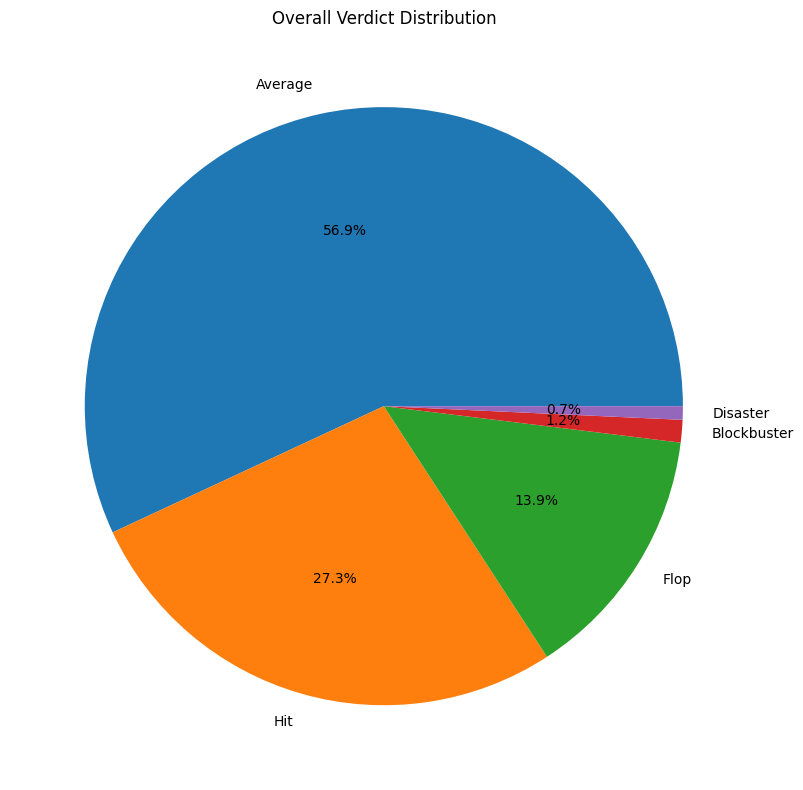

In [70]:
df_verdict = df_movies['Verdict'].value_counts()
plt.figure(figsize=(12, 8))
plt.pie(df_verdict.values, labels=df_verdict.index, autopct='%1.1f%%') 
plt.title("Overall Verdict Distribution")
plt.tight_layout()
plt.show()

# 2) Which genres consistently produce the highest-rated movies?

C:\Users\veldu\AppData\Local\Temp\ipykernel_14540\2680770411.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_5_genres, x="Rating", y="Genres", palette="viridis")


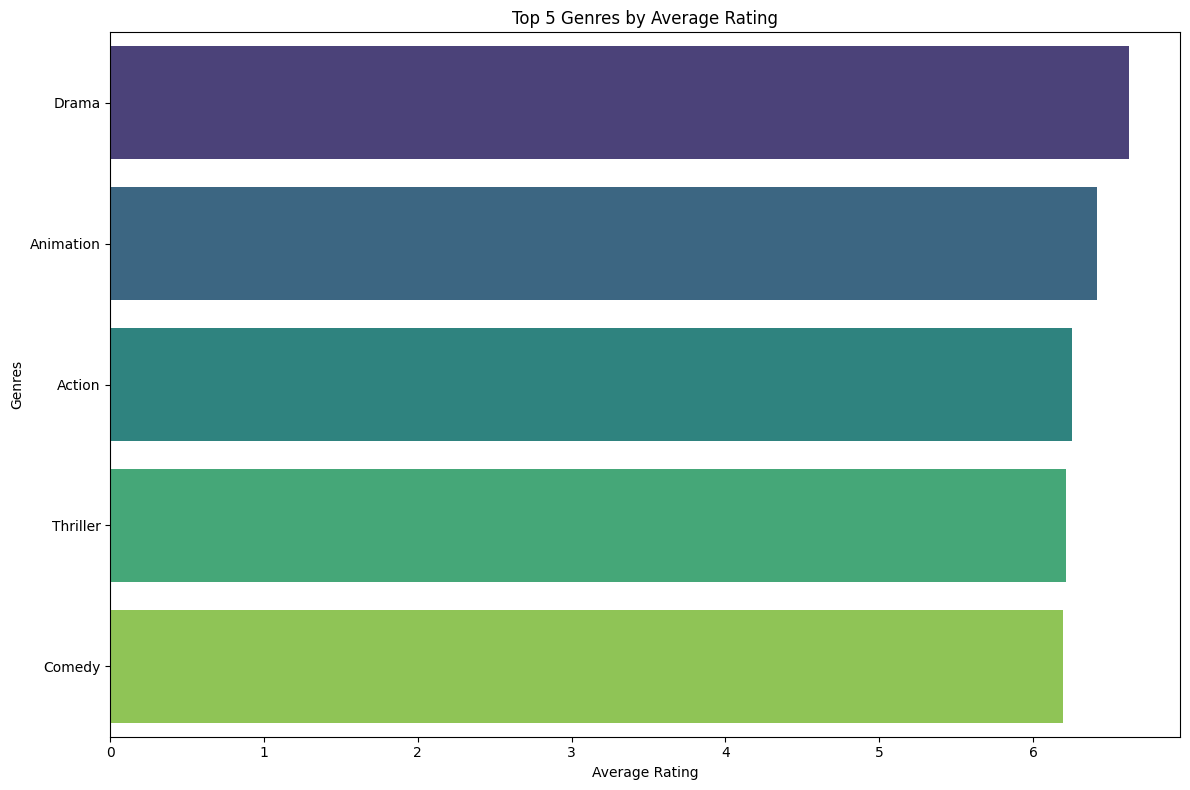

In [71]:
avg_genres = df_movies.groupby("Genres")["Rating"].mean().reset_index().sort_values("Rating", ascending=False)
top_5_genres = avg_genres.head(5)
plt.figure(figsize=(12,8))
sns.barplot(data=top_5_genres, x="Rating", y="Genres", palette="viridis")
plt.xlabel("Average Rating")
plt.ylabel("Genres")
plt.title("Top 5 Genres by Average Rating")
plt.tight_layout()
plt.show()

# 3) What is the average number of votes per movie in each genre?

C:\Users\veldu\AppData\Local\Temp\ipykernel_14540\1749942678.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_5_votes, x="No_of_votes", y="Genres", palette="viridis")


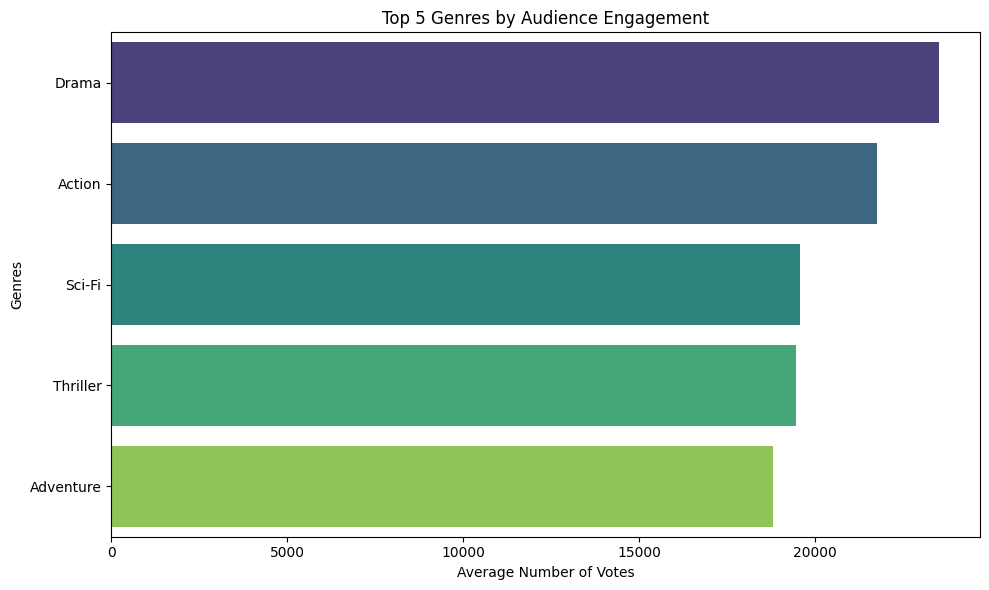

In [72]:
avg_votes = df_movies.groupby("Genres")["No_of_votes"].mean().reset_index().sort_values("No_of_votes", ascending=False)
top_5_votes = avg_votes.head(5)
plt.figure(figsize=(10,6))
sns.barplot(data=top_5_votes, x="No_of_votes", y="Genres", palette="viridis")
plt.title("Top 5 Genres by Audience Engagement")
plt.xlabel("Average Number of Votes")
plt.ylabel("Genres")
plt.tight_layout()
plt.show()

# 4) Top 10 Directors by Number of Hit Movies

C:\Users\veldu\AppData\Local\Temp\ipykernel_14540\4065693601.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_directors, x='Director', y='Hit_Movie_Count', palette="magma")


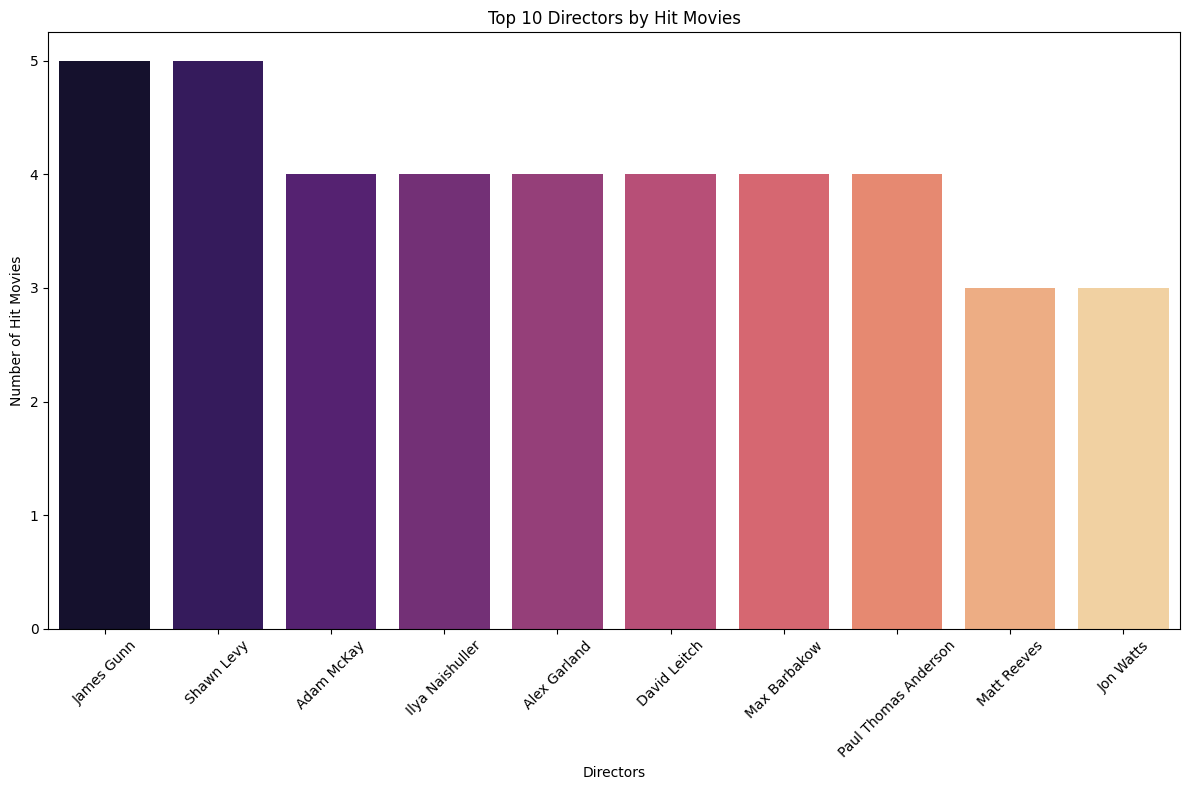

In [73]:
df_hit=df_movies[df_movies["Verdict"]=="Hit"]
top_directors = df_hit["Director"].value_counts().nlargest(10).reset_index()
top_directors.columns = ['Director', 'Hit_Movie_Count']
plt.figure(figsize=(12,8))
sns.barplot(data=top_directors, x='Director', y='Hit_Movie_Count', palette="magma") 
plt.xticks(rotation=45)
plt.title('Top 10 Directors by Hit Movies')
plt.xlabel("Directors")
plt.ylabel("Number of Hit Movies")
plt.tight_layout()
plt.show()

# 5) Genre vs Verdict

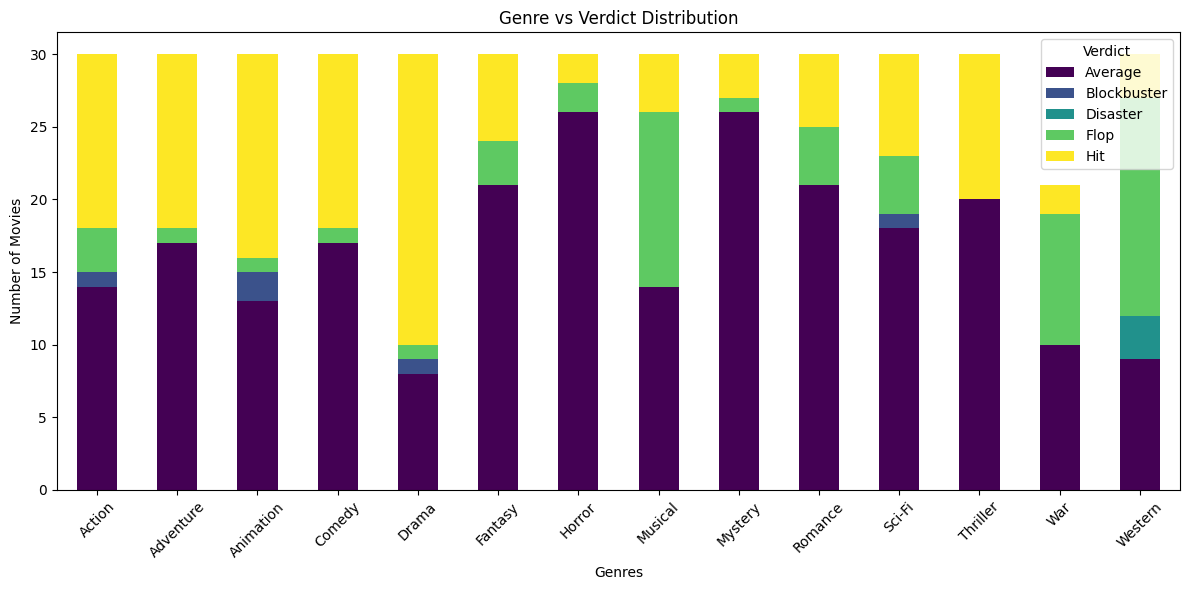

In [74]:
verdict_by_genre = df_movies.groupby(['Genres', 'Verdict']).size().unstack(fill_value=0)
verdict_by_genre.plot(kind='bar', stacked=True, figsize=(12,6), colormap='viridis')
plt.title("Genre vs Verdict Distribution")
plt.ylabel("Number of Movies")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 6) Top Actors in High-Rated Movies

C:\Users\veldu\AppData\Local\Temp\ipykernel_14540\1409354572.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_actors_df, x='Count', y='Actor', palette='viridis')


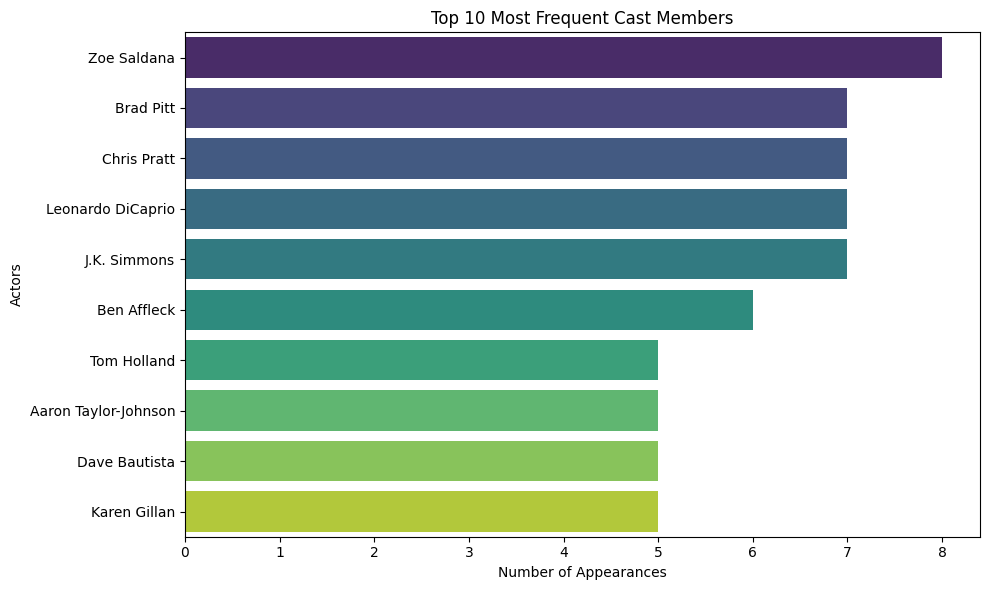

In [75]:
from collections import Counter
df_hit=df_movies[df_movies["Verdict"]=="Hit"]
cast_lists = df_hit['Cast_members'].str.split(', ')

all_actors = []
for movie_cast in cast_lists.dropna():  
    for actor in movie_cast:
        all_actors.append(actor.strip()) 

actor_counts = Counter(all_actors)
top_10_actors = actor_counts.most_common(10)

top_actors_df = pd.DataFrame(top_10_actors, columns=['Actor', 'Count'])

plt.figure(figsize=(10, 6)) 
sns.barplot(data=top_actors_df, x='Count', y='Actor', palette='viridis')
plt.xlabel("Number of Appearances")
plt.ylabel("Actors")
plt.title("Top 10 Most Frequent Cast Members")
plt.tight_layout()
plt.show()

# 7) Average Rating Trend by Year

In [76]:
data_year=df_movies.groupby("Year")["Rating"].mean().reset_index()
data_year

,Year,Rating
0,2020,5.738462
1,2021,5.926923
2,2022,5.703448
3,2023,6.045333
4,2024,6.134426
5,2025,5.000000


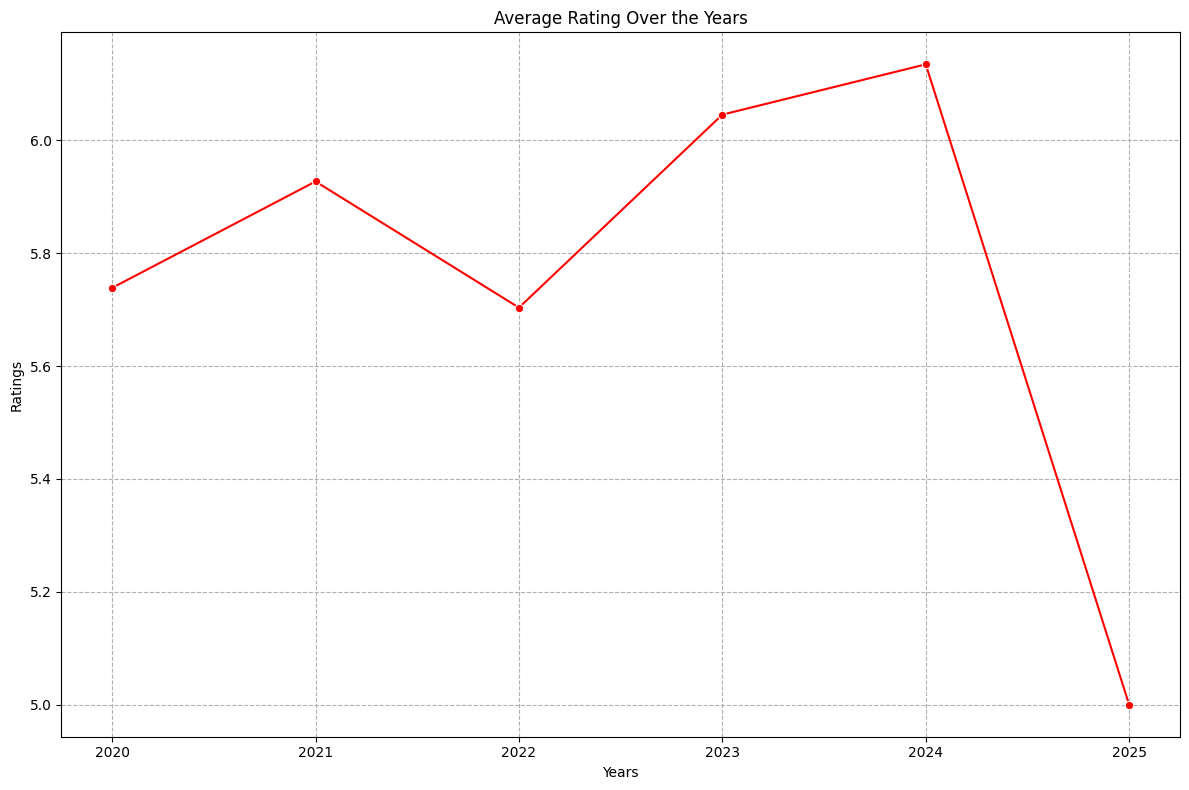

In [77]:
plt.figure(figsize=(12,8))
sns.lineplot(data=data_year,x="Year",y="Rating",marker="o",c="r")
plt.title('Average Rating Over the Years')
plt.xlabel("Years")
plt.ylabel("Ratings")
plt.grid(linestyle='--')
plt.tight_layout()
plt.show()

# 8) Rating vs  No_of_votes

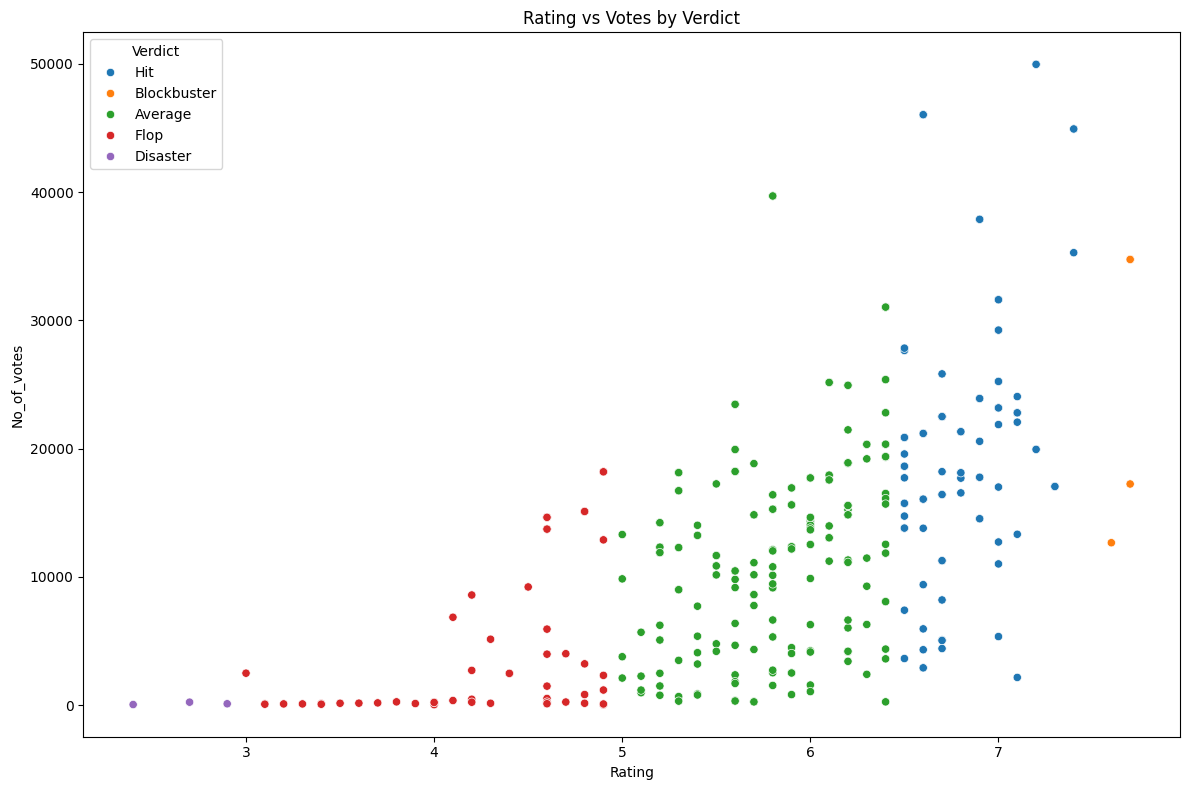

In [78]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df_movies, x='Rating', y='No_of_votes', hue='Verdict')
plt.title('Rating vs Votes by Verdict')
plt.tight_layout()
plt.show()

# 9) Average No. of Votes for Verdict

C:\Users\veldu\AppData\Local\Temp\ipykernel_14540\941169683.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_verdict,x="Verdict",y="No_of_votes",palette=verdict_colors)


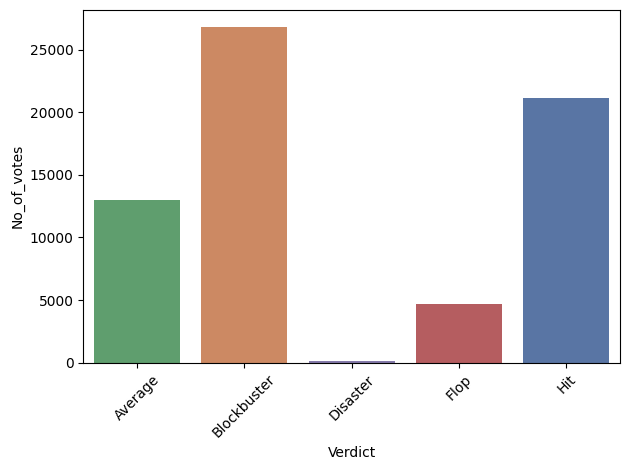

In [79]:
df_verdict = df_movies.groupby("Verdict")["No_of_votes"].mean().reset_index()
verdict_colors = {
    'Hit': '#4C72B0',          # Soft Royal Blue
    'Blockbuster': '#DD8452',  # Elegant Orange
    'Average': '#55A868',      # Modern Green
    'Flop': '#C44E52',         # Subtle Red
    'Disaster': '#8172B2'      # Lavender
}
sns.barplot(data=df_verdict,x="Verdict",y="No_of_votes",palette=verdict_colors)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 10) Number of "Hit" Movies per Year

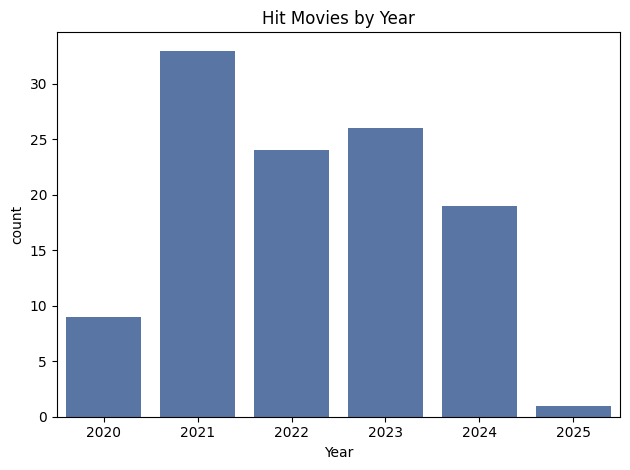

In [80]:
df_hit=df_movies[df_movies['Verdict'] == 'Hit']
sns.countplot(data=df_hit, x='Year',color="#4C72B0")
plt.title('Hit Movies by Year')
plt.tight_layout()
plt.show()

# 11) Number of "Blockbuster" Movies per Year

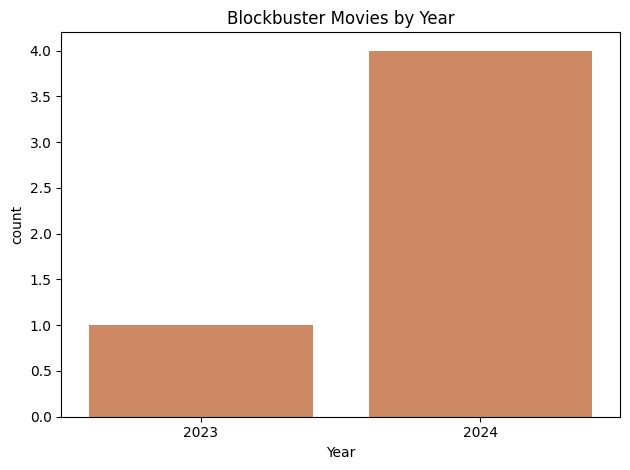

In [81]:
df_block=df_movies[df_movies['Verdict'] == 'Blockbuster']
sns.countplot(data=df_block,x="Year",color="#DD8452")
plt.title('Blockbuster Movies by Year')
plt.tight_layout()
plt.show()

# 12) Number of "Flop" Movies per Year

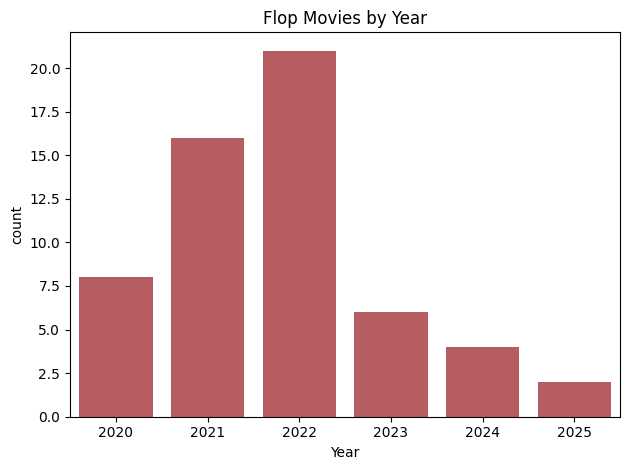

In [82]:
df_flop = df_movies[df_movies['Verdict'] == 'Flop']
sns.countplot(data=df_flop,x="Year",color='#C44E52')
plt.title('Flop Movies by Year')
plt.tight_layout()
plt.show()

# 13) Number of "Average" Movies per Year

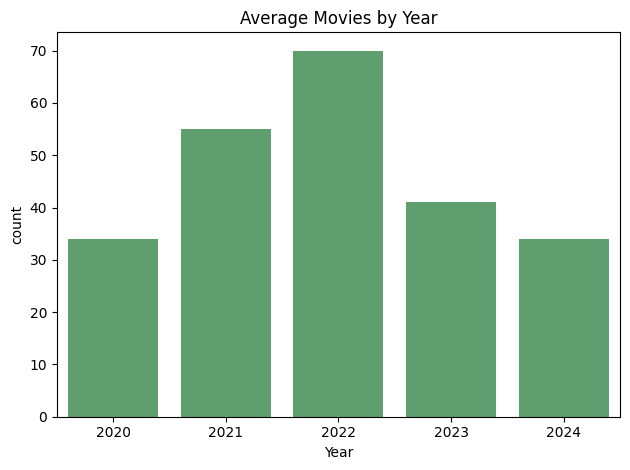

In [83]:
df_avg=df_movies[df_movies['Verdict'] == 'Average']
sns.countplot(data=df_avg,x="Year",color='#55A868')
plt.title('Average Movies by Year')
plt.tight_layout()
plt.show()

# 14) Number of "Disaster" Movies per Year

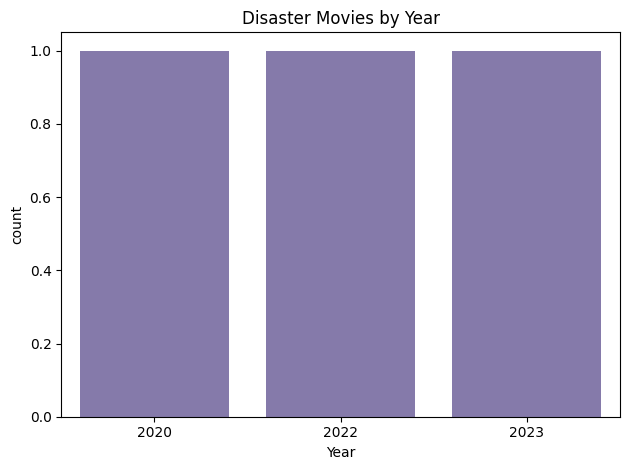

In [84]:
df_disaster=df_movies[df_movies['Verdict'] == 'Disaster']
sns.countplot(data=df_disaster,x="Year",color='#8172B2' )
plt.title('Disaster Movies by Year')
plt.tight_layout()
plt.show()